#**Automate Emotion Detection From Paragraphs using ML and DL**

#**Used Algorithms:-**



###**1.   ML Models:- Logistic Regression, Naive Bayes, and SVM.**


###**2.   DL Models:- Bi-Directional LSTM and Convolutional Neural Network**





#**Importing the Required Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string  # Import the string module for punctuation handling
import itertools  # Import itertools for plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords  # Make sure nltk is installed for stopwords

# Load dataset
df = pd.read_csv('data/train.csv')

#**Data Pre-Processing**

In [ ]:
# Display first few rows
df.head()

# Preprocess text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = text.split()
    # Remove stopwords (optional, requires nltk stopwords list)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

#**Exploratory Data Analysis**

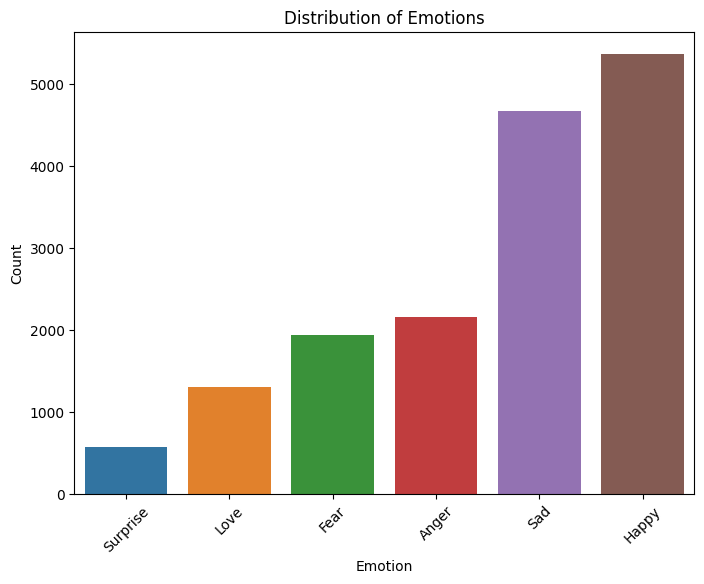

In [ ]:
# Exploratory Data Analysis

# lable mapping
label_mapping = {
    0: 'Sad',
    1: 'Happy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

df['label'] = df['label'].map(label_mapping).fillna(df['label'])

# Calculate the counts of each emotion category
emotion_counts = df['label'].value_counts()

# Sort the categories in ascending order based on their counts
sorted_emotions = emotion_counts.sort_values().index

# Plot the distribution of emotion categories in ascending order
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, order=sorted_emotions)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#**Label Mapping**

In [ ]:
# lable mapping
label_mapping = {
    'Sad':0,
    'Happy':1,
    'Love':2,
    'Anger':3,
    'Fear':4,
    'Surprise':5
}

df['label'] = df['label'].map(label_mapping).fillna(df['label'])

#**Train-Test Split**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

#**TF-IDF Vectorization**

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#**Defining a Confusion Matrix Function**

In [ ]:
# Define the custom plot_confusion_matrix function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

emotions = ['Sad', 'Happy', 'Love', 'Anger', 'Fear', 'Surprise']

#**Model Building**

#**Logistic Regression**

Logistic Regression Accuracy: 0.86625
Logistic Regression Precision: 0.869451247978607
Logistic Regression Recall: 0.86625
Logistic Regression F1 Score: 0.8612996326427544


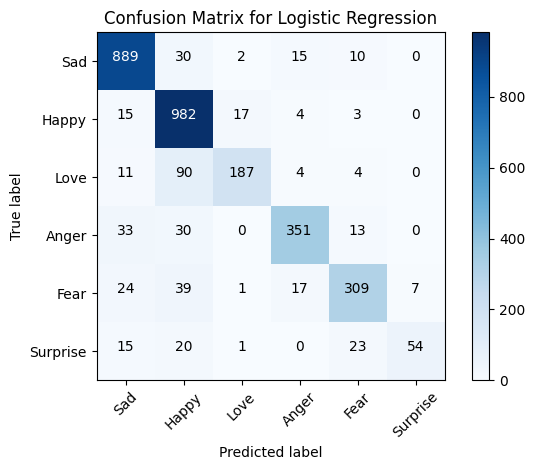

In [ ]:
# Train and evaluate Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Logistic Regression Precision:', precision_score(y_test, y_pred_log_reg, average='weighted'))
print('Logistic Regression Recall:', recall_score(y_test, y_pred_log_reg, average='weighted'))
print('Logistic Regression F1 Score:', f1_score(y_test, y_pred_log_reg, average='weighted'))

# Compute and plot confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
plot_confusion_matrix(cm_log_reg, emotions, title='Confusion Matrix for Logistic Regression')
plt.show()

#**Naive Bayes Model**

Naive Bayes Accuracy: 0.7190625
Naive Bayes Precision: 0.7867641179461465
Naive Bayes Recall: 0.7190625
Naive Bayes F1 Score: 0.6689774046680794


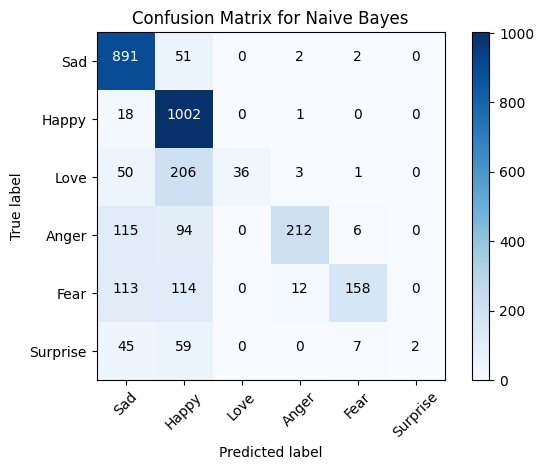

In [ ]:
# Train and evaluate Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test_tfidf)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_naive_bayes))
print('Naive Bayes Precision:', precision_score(y_test, y_pred_naive_bayes, average='weighted'))
print('Naive Bayes Recall:', recall_score(y_test, y_pred_naive_bayes, average='weighted'))
print('Naive Bayes F1 Score:', f1_score(y_test, y_pred_naive_bayes, average='weighted'))

# Compute and plot confusion matrix
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes, labels=naive_bayes.classes_)
plot_confusion_matrix(cm_naive_bayes, emotions, title='Confusion Matrix for Naive Bayes')
plt.show()

#**SVM Model**

SVM Accuracy: 0.8853125
SVM Precision: 0.8844634009790472
SVM Recall: 0.8853125
SVM F1 Score: 0.8839436930517072


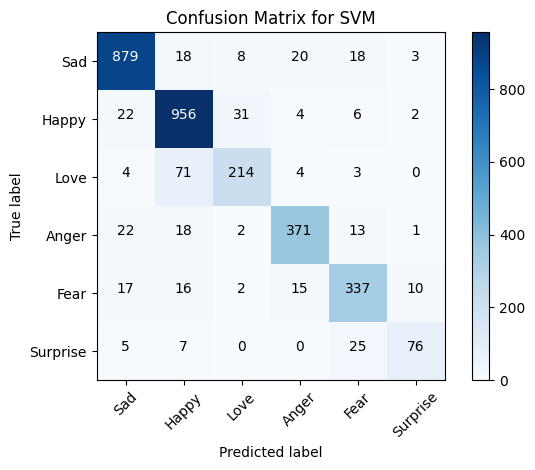

In [ ]:
# Train and evaluate SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('SVM Precision:', precision_score(y_test, y_pred_svm, average='weighted'))
print('SVM Recall:', recall_score(y_test, y_pred_svm, average='weighted'))
print('SVM F1 Score:', f1_score(y_test, y_pred_svm, average='weighted'))

# Compute and plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
plot_confusion_matrix(cm_svm, emotions, title='Confusion Matrix for SVM')
plt.show()

#**Tokenizing**

In [ ]:
# Prepare data for deep learning models
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

#**Bi-Directional LSTM Model**

Epoch 1/5


c:\Users\ravip\miniconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


320/320 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4192 - loss: 1.4434 - val_accuracy: 0.8281 - val_loss: 0.5524
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8878 - loss: 0.3536 - val_accuracy: 0.8863 - val_loss: 0.3405
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9598 - loss: 0.1282 - val_accuracy: 0.8938 - val_loss: 0.3180
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.8984 - val_loss: 0.3554
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9897 - loss: 0.0384 - val_accuracy: 0.8973 - val_loss: 0.3734
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
BiLSTM Accuracy: 0.8996875
BiLSTM Precision: 0.8990668392703669
BiLSTM Recall: 0.8996875
BiLSTM F1 Score: 0.8991739892951398


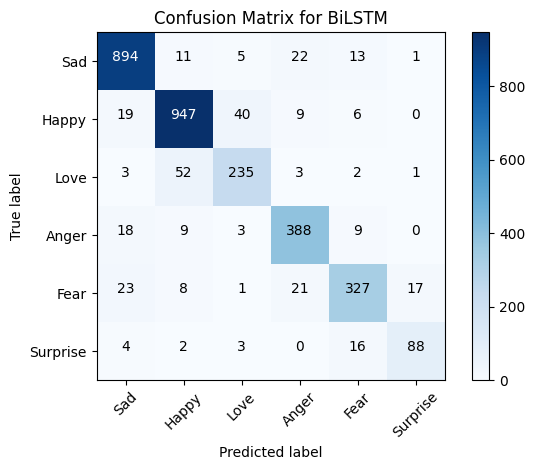

In [ ]:
# Train and evaluate BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
bilstm_model.add(Bidirectional(LSTM(64)))
bilstm_model.add(Dense(6, activation='softmax'))
bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
y_pred_bilstm = bilstm_model.predict(X_test_pad)
y_pred_bilstm_classes = np.argmax(y_pred_bilstm, axis=1)
print('BiLSTM Accuracy:', accuracy_score(np.argmax(y_test_cat, axis=1), y_pred_bilstm_classes))
print('BiLSTM Precision:', precision_score(np.argmax(y_test_cat, axis=1), y_pred_bilstm_classes, average='weighted'))
print('BiLSTM Recall:', recall_score(np.argmax(y_test_cat, axis=1), y_pred_bilstm_classes, average='weighted'))
print('BiLSTM F1 Score:', f1_score(np.argmax(y_test_cat, axis=1), y_pred_bilstm_classes, average='weighted'))

# Confusion matrix for the best model (BiLSTM in this case)
cm_bilstm = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_bilstm_classes)
plot_confusion_matrix(cm_bilstm, emotions, title='Confusion Matrix for BiLSTM')

plt.show()

#**Convolutional Neural Network Model**

Epoch 1/5


c:\Users\ravip\miniconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4133 - loss: 1.4321 - val_accuracy: 0.8332 - val_loss: 0.4675
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8946 - loss: 0.2995 - val_accuracy: 0.8992 - val_loss: 0.3012
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9640 - loss: 0.1017 - val_accuracy: 0.9051 - val_loss: 0.2991
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9848 - loss: 0.0460 - val_accuracy: 0.9023 - val_loss: 0.3368
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9882 - loss: 0.0312 - val_accuracy: 0.8969 - val_loss: 0.3665
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN Accuracy: 0.904375
CNN Precision: 0.9059526083532083
CNN Recall: 0.904375
CNN F1 Score: 0.9044348817567373


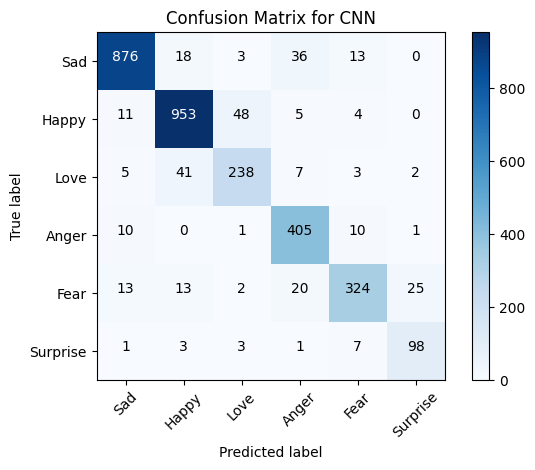

In [ ]:
# Train and evaluate CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(6, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
y_pred_cnn = cnn_model.predict(X_test_pad)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
print('CNN Accuracy:', accuracy_score(np.argmax(y_test_cat, axis=1), y_pred_cnn_classes))
print('CNN Precision:', precision_score(np.argmax(y_test_cat, axis=1), y_pred_cnn_classes, average='weighted'))
print('CNN Recall:', recall_score(np.argmax(y_test_cat, axis=1), y_pred_cnn_classes, average='weighted'))
print('CNN F1 Score:', f1_score(np.argmax(y_test_cat, axis=1), y_pred_cnn_classes, average='weighted'))

# Compute and plot confusion matrix
cm_cnn = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_cnn_classes)
plot_confusion_matrix(cm_cnn, emotions, title='Confusion Matrix for CNN')
plt.show()